# Assignment 2 - Elementary Probability and Information Theory 
# Boise State University DL - Dr. Kennington

### Instructions and Hints:

* This notebook loads some data into a `pandas` dataframe, then does a small amount of preprocessing. Make sure your data can load by stepping through all of the cells up until question 1. 
* Most of the questions require you to write some code. In many cases, you will write some kind of probability function like we did in class using the data. 
* Some of the questions only require you to write answers, so be sure to change the cell type to markdown or raw text
* Don't worry about normalizing the text this time (e.g., lowercase, etc.). Just focus on probabilies. 
* Most questions can be answered in a single cell, but you can make as many additional cells as you need. 
* When complete, please export as HTML. Follow the instructions on the corresponding assignment Trello card for submitting your assignment. 

In [1]:
import pandas as pd 

data = pd.read_csv('pnp-train.txt',delimiter='\t',encoding='latin-1', # utf8 encoding didn't work for this
                  names=['type','name']) # supply the column names for the dataframe

# this next line creates a new column with the lower-cased first word
data['first_word'] = data['name'].map(lambda x: x.lower().split()[0])

In [2]:
data[:10]

,type,name,first_word
0,drug,Dilotab,dilotab
1,movie,Beastie Boys: Live in Glasgow,beastie
2,person,Michelle Ford-Eriksson,michelle
3,place,Ramsbury,ramsbury
4,place,Market Bosworth,market
5,drug,Cyanide Antidote Package,cyanide
6,person,Bill Johnson,bill
7,place,Ettalong,ettalong
8,movie,The Suicide Club,the
9,place,Pézenas,pézenas


In [3]:
data.describe()

,type,name,first_word
count,21001,21001,21001
unique,5,20992,13703
top,movie,George Washington,the
freq,6262,2,635


## 1. Write a probability function/distribution $P(T)$ over the types. 

Hints:

* The Counter library might be useful: `from collections import Counter`
* Write a function `def P(T='')` that returns the probability of the specific value for T
* You can access the types from the dataframe by calling `data['type']`

## 2. What is `P(T='movie')` ?

0.29817627732012764

## 3. Show that your probability distribution sums to one.

1.0

## 4. Write a joint distribution using the type and the first word of the name

Hints:

* The function is $P2(T,W_1)$
* You will need to count up types AND the first words, for example: ('person','bill)
* Using the zip function was useful for me here

## 5. What is P2(T='person', W1='bill')? What about P2(T='movie',W1='the')?

0.00047616780153326033

0.02747488214846912

## 6. Show that your probability distribution P(T,W1) sums to one.

1.0

## 7. Make a new function Q(T) from marginalizing over P(T,W1) and make sure that Q(T) sums to one.

Hints:

* Your Q function will call P(T,W1)
* Your check for the sum to one should be the same answer as Question 3, only it calls Q instead of P.

0.2981762773201236

1.0

## 8. What is the KL Divergence of your Q function and your P function for Question 1?

* Even if you know the answer, you still need to write code that computes it.

-0.0

## 9. Convert from P(T,W1) to P(W1|T) 

Hints:

* Just write a comment cell, no code this time. 
* Note that $P(T,W1) = P(W1,T)$

## $P(W_1|T) = \frac{P(W_1,T)}{P(T)}$

## 10. Write a function `Pwt` (that calls the functions you already have) to compute $P(W_1|T)$.

* This will be something like the multiplication rule, but you may need to change something

## 11. What is P(W1='the'|T='movie')?

0.09214308527626956

## 12. Use Baye's rule to convert from P(W1|T) to P(T|W1). Write a function Ptw to reflect this. 

Hints:

* Call your other functions.
* You may need to write a function for P(W1) and you may need a new counter for `data['first_word']`

## 13 
### What is P(T='movie'|W1='the')? 
### What about P(T='person'|W1='the')?
### What about P(T='drug'|W1='the')?
### What about P(T='place'|W1='the')
### What about P(T='company'|W1='the')

## 14 Given this, if the word 'the' is found in a name, what is the most likely type?

## 15. Is Ptw(T='movie'|W1='the') the same as Pwt(W1='the'|T='movie') the same? Why or why not?

## 16. Do you think modeling Ptw(T|W1) would be better with a continuous function like a Gaussian? Why or why not?



* Load the `rivers.csv` file and print out a histogram
* Which disitrbutions do you think would fit the data for the `x` column? Here is a list: https://en.wikipedia.org/wiki/Category:Continuous_distributions
* Hint: look at some of the exponential distributions, and maybe the Pareto, you can always use Gaussian
* Use the principle of Maximum Entropy to detemrine which of the two distributions would best fit your data (you can sum over all values in your data)
* You will need to estimate the parameters needed for each distribution (you may need to write maximum likelihood estimation functions for estimating your parameters)
* You can use built-in python functions to model the (pdf) distribution, if they exist. Otherwise, you may need to write your own
* Show the Maximum Entropy calculations. 
* Calculate the KL divergence on the two distributions (in both directions)
* make nice markdown commments so I know where everything is

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h1 style="font-family:Garamond; color:tomato">Excercise rivers.csv</h1>
        <h2 style="font-family:Garamond; color:solid #229954">Step 1/9</h2>
        <h3 style="font-family:Garamond;">Load the rivers.csv and printout a histogram</h3>
        <hr/>
    </section>
</body>

In [13]:
%matplotlib inline  

import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('rivers.csv') 

In [15]:
data.describe()

,Unnamed: 0,x
count,141.000000,141.000000
mean,71.000000,591.184397
std,40.847277,493.870842
min,1.000000,135.000000
25%,36.000000,310.000000
50%,71.000000,425.000000
75%,106.000000,680.000000
max,141.000000,3710.000000


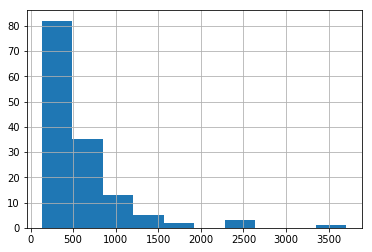

In [16]:
data.x.hist()